# INFO 2950 Project Phase II

## I. Research Questions

write questions here


## II. Data Collecting and Cleaning

### A. Setup

Here is the setup part that imports everything needed throughout the rest of the notebook.  I copied the imports from homework 2 since they match what is needed here.

In [829]:
import sys
!conda install --yes --prefix {sys.prefix} requests
!conda install --yes --prefix {sys.prefix} bs4
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



### B. "Library" 

Although it's not an actual separate library, I ended up creating a lot of functions and some variables to help me clean up the data and this section is where they all live.  A description of what the functions do can be found in their respective docstrings and the motivations for using them are specified in the next section which is where all of the actual data cleaning magic takes place.

In [830]:
def web_to_soup(web_address, file_name):
    """ 
    Returns a BeautufulSoup object containing the html from the webpage passed as the web_address argument and saves the
    content in a file named using the argument passed as file_name.
    
    web_address: string. The address of the webpage to get html from.
    
    file_name: string. The name of the file where the html from the website will be saved.
    """
    response = requests.get(web_address)
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    file = file_name
    with open(file, mode='w', encoding='utf-8') as f:
        f.write(response.text)
    return soup

In [831]:
def extract_categories(soup):
    """ 
    Returns a list of categories (strings with "th" tags whose class is either subhead1 or subhead2) from the left 
    side of the samhsa data tables where each index's entry is a string.
    
    soup: BeautifulSoup object containing the html from which the categories will be extracted.
    """
    search = soup.find_all("th",{"class":["subhead2","subhead1"]}) 
    categories = []
    for tag in search:
        categories.append(tag.text)
    categories = np.array(categories)
    return categories

In [832]:
def pull_out_data(soup):
    """
    Returns a list where each entry is a data entry (string with 'td' tag) from the html given by the BeautifulSoup 
    object passed as the soup argument.
    
    soup: BeautifulSoup object from which the data will be collected.
    """
    search = soup.find_all("td") 
    data_entries = []
    for tag in search:
        data_entries.append(tag.text)
    data_entries = np.array(data_entries)
    return data_entries

In [833]:
def delete_blank(data_array):
    """
    Returns a list of data identical to the argument passed to it but with '\xa0' entries removed.
    
    data_array: the list from which blank entries are to be deleted.
    """
    to_delete = []
    for i in range(len(data_array)):
        if data_array[i]=='\xa0':
            to_delete.append(i)
    data = np.delete(data_array, to_delete)
    return data

In [869]:
def delete_footnotes_and_commas(dataframe):
    """
    Returns a pandas DataFrame identical to the argument passed in dataframe but with 'a' and ',' removed from each string entry 
    in the DataFrame.
    
    dataframe: the pandas DataFrame from which 'a' and ',' will be deleted in all entries.
    """
    col_names = dataframe.columns.values.tolist()
    row_count = len(dataframe)
    for name in col_names:
        for i in range(row_count):
            if('a' in dataframe[name][i]):
                dataframe[name][i]=dataframe[name][i].replace('a', '')
            if(',' in dataframe[name][i]):
                dataframe[name][i]=dataframe[name][i].replace(',', '')
    return dataframe

In [870]:
def arrange_data(array, number_of_rows, number_of_columns):
    """
    Returns a 2D list with number_of_rows 1D lists each with number_of_columns entries.
    
    array: 1D list from which the data will be rearranged.
    
    number_of_rows: int. the number of rows that the returned 2D list will have.
    
    number_of_columns: int. the number of columns that the returned 2D list will have.
    """
    formatted_data=[]
    count=0
    for i in range(number_of_rows):
        formatted_data.append(array[count:count+number_of_columns:1])
        count+=number_of_columns
    return formatted_data

In [836]:
def to_numbers(dataframe):
    """
    Returns a pandas DataFrame with all entries turned into numeric datatypes (ints, floats).  If an entry cannot be converted
    into a numerica data type, it will replace the entry with NaN.
    
    dataframe: the pandas DataFrame on which the operation described above will be performed.
    """
    col_names = dataframe.columns.values.tolist()
    row_count = len(dataframe)
    for name in col_names:
        for i in range(row_count):
            dataframe[name][i]=pd.to_numeric(dataframe[name][i], 'coerce')
    return dataframe

In [837]:
years1 = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
years2 = ['2002', '2003', '2004', '2005', '2006', '2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
ages1 = ['aged_12+_2018', 'aged_12+_2019','aged_12-17_2018', 'aged_12-17_2019','aged_18+_2018','aged_18+_2019', 'aged_18-25_2018','aged_18-25_2019', 'aged_26+_2018', 'aged_26+_2019']
ages2 = ['aged_18+_2018', 'aged_18+_2019','aged_18-25_2018', 'aged_18-25_2019','aged_26+_2018','aged_26+_2019', 'aged_26-49_2018','aged_26-49_2019', 'aged_50+_2018', 'aged_50+_2019']



### C. Data Cleaning Time!

First, I put all of the actual web scraping code in a cell of its own since it took a few seconds for the content of each page to be gathered and I wanted to make that a one-and-done task.  I used the function web_to_soup() that I wrote above to get the html content from the website specified in the argument web_address.  This function also dumps the html into a file whose name is given in the argument file_name.


In [838]:
soup1=web_to_soup('https://www.samhsa.gov/data/sites/default/files/reports/rpt29394/NSDUHDetailedTabs2019/NSDUHDetTabsSect10pe2019.htm', 'samhsa1.html')
soup2=web_to_soup('https://www.samhsa.gov/data/sites/default/files/reports/rpt29394/NSDUHDetailedTabs2019/NSDUHDetTabsSect11pe2019.htm', 'samhsa2.html')
soup3=web_to_soup('https://www.samhsa.gov/data/sites/default/files/reports/rpt29394/NSDUHDetailedTabs2019/NSDUHDetTabsSect1pe2019.htm', 'samhsa3.html')

Since our project incorporates a lot of different data from a lot of different data tables that don't intuitively merge well, I created a dictionary to store a description of the information provided by each DataFrame (see below).

In [1000]:
what_it_do = {'df2':'Any Mental Illness in Past Year among Persons Aged 18 or Older, by Demographic Characteristics: Percentages: 2008-2019', 
              'df5':'Illicit drug use percent by demographic, 2009-2019', 
              'df6':'Mental illness percent by age group and demographic',
              'df7':'Illicit Drug Use in Past Year among Persons Aged 18 or Older, by Demographic Characteristics: Percentages: 2009-2019'}

Below, I use the BeautifulSoup objects I created along with the variables and functions I wrote above in the "Library" section in order to clean the data and get it ready for analyzing. I did this by first extracting the categories from the left side and top of the SAMHSA tables from the html given by the BeautifulSoup object (and adding entries as necessary if any of them didn't get picked up from the original table due to having different html tags than the extract_categories() function above searches for) and collecting the actual entries in the data table.  Next, I format the data so it has the right number of columns and rows, create a pandas DataFrame with it, add index and column labels, delete footnotes and commas, turn the data entries from strings into numeric entries (replacing non-covertable entries with NaN), and lastly transpose the DataFrame so that we can run analyses using the columns.

We made the conscious decision to replace missing numeric values with NaN since this would allow us to later perform analyses on all columns, even the ones containing missing entries.  For example, the .corr() method automatically works even if a column contains NaN entries.

Please note that DataFrames are labeled dfx where x is a number.  The DataFrames were originally labeled sequentially (df1, df2, ...) but some DataFrames were deleted due to having unneeded data.

In [903]:
demographics = extract_categories(soup1)
demographics2 = demographics[14:28]
demographics2 = np.insert(demographics2,0,"total")
data2=pull_out_data(soup1)
data2 = data2[216:432]
data2 = delete_blank(data2)
data2_formatted = arrange_data(data2, 15, 12)
df2 = pd.DataFrame(data2_formatted, demographics2, years)
df2 = delete_footnotes_and_commas(df2)
df2 = df2.transpose()
df2 = to_numbers(df2)
print(what_it_do['df2'])
df2

Any Mental Illness in Past Year among Persons Aged 18 or Older, by Demographic Characteristics: Percentages: 2008-2019


,total,18-25,26 or Older,26-49,50 or Older,Male,Female,Not Hispanic or Latino,White,Black or African American,AIAN,NHOPI,Asian,Two or More Races,Hispanic or Latino
2008,17.7,18.5,17.6,20.7,14.1,13.6,21.5,18.0,18.3,16.7,17.3,NaN,13.3,26.5,16.0
2009,18.1,18.0,18.2,21.6,14.5,14.2,21.8,18.5,19.2,15.6,20.0,NaN,12.8,31.1,15.7
2010,18.1,18.1,18.1,20.9,15.1,14.8,21.1,18.5,19.0,16.9,17.4,NaN,13.7,22.0,15.2
2011,17.8,18.5,17.7,20.3,15.0,14.2,21.1,18.5,19.0,16.3,27.7,NaN,13.1,25.8,13.5
2012,18.6,19.6,18.4,21.2,15.8,14.9,22.0,19.0,19.3,18.6,28.3,NaN,13.9,20.7,16.3
2013,18.5,19.4,18.3,21.5,15.3,14.4,22.3,18.7,19.3,16.9,26.0,14.4,12.3,28.1,16.9
2014,18.1,20.1,17.8,20.4,15.4,14.1,21.8,18.6,19.2,16.3,21.2,22.3,13.1,27.1,15.6
2015,17.9,21.7,17.2,20.9,14.0,14.3,21.2,18.5,19.3,15.4,21.2,14.8,12.0,29.5,14.5
2016,18.3,22.1,17.6,21.1,14.5,14.5,21.7,18.7,19.9,14.5,22.8,16.7,12.1,26.5,15.7
2017,18.9,25.8,17.8,22.2,13.8,15.1,22.3,19.6,20.4,16.2,18.9,19.4,14.5,28.6,15.2


In [883]:
demographics3 = extract_categories(soup3)
demographics3 = demographics3.tolist()
itemindex = demographics3.index('Male')
demographics3 = demographics3[itemindex:itemindex+18]
demographics3 = np.asarray(demographics3)
data5 = pull_out_data(soup3)
data5 = data5.tolist()
#data5.index('49.2a')
data5 = data5[5882:5882+230]
data5=delete_blank(data5)
data5_formatted = arrange_data(data5, 18, 10)
df5 = pd.DataFrame(data5_formatted, demographics3, ages1)
df5=delete_footnotes_and_commas(df5)
df5 = to_numbers(df5)
df5 = df5.transpose()
print(what_it_do['df5'])
df5


,Male,Female,Not Hispanic or Latino,White,Black or African American,AIAN,NHOPI,Asian,Two or More Races,Hispanic or Latino,< High School,High School Graduate,Some College/Associate's Degree,College Graduate,Full-Time,Part-Time,Unemployed,Other1
aged_12+_2018,49.2,53.6,45.1,51.6,54.5,45.9,60.8,47.7,27.6,61.4,37.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aged_12+_2019,50.2,54.2,46.3,52.2,55.6,46.9,55.7,44.0,24.0,62.6,40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aged_12-17_2018,23.9,23.8,24.0,23.5,23.4,26.2,28.4,NaN,13.7,28.7,25.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aged_12-17_2019,24.5,23.8,25.2,24.1,24.3,25.5,37.5,NaN,12.9,27.9,25.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aged_18+_2018,51.8,56.7,47.2,54.1,57.1,48.2,64.2,49.2,29.0,67.4,39.6,37.5,47.7,57.8,54.6,58.2,54.4,57.8
aged_18+_2019,52.7,57.4,48.3,54.8,58.2,49.3,58.0,45.5,24.9,70.0,42.3,40.8,49.2,58.9,53.9,58.5,55.8,57.6
aged_18-25_2018,55.6,56.2,54.9,56.6,59.6,53.1,56.0,NaN,36.8,68.7,52.0,47.7,53.1,58.9,59.1,60.4,55.1,58.4
aged_18-25_2019,55.8,55.9,55.7,57.1,60.4,52.8,64.0,NaN,35.3,64.0,51.6,50.0,52.1,58.3,62.7,62.9,54.4,53.1
aged_26+_2018,51.2,56.8,46.0,53.8,56.8,47.2,65.6,NaN,27.5,67.1,36.8,35.7,46.6,57.6,54.3,58.0,54.2,57.5
aged_26+_2019,52.2,57.7,47.2,54.4,57.9,48.6,56.8,46.4,23.2,71.6,40.2,39.1,48.6,59.0,53.3,57.9,56.3,59.8


The data below was entered manually because the way it was written in the html file was out of order and there was no logical way to extract it directly.  Instead, we decided that copying and pasting it directly from the data table was the best option.

In [1002]:
## data is from the following set of tables: https://www.samhsa.gov/data/sites/default/files/reports/rpt29394/NSDUHDetailedTabs2019/NSDUHDetTabsSect8pe2019.htm

data6=[]
data6.append([19.1,20.6,6.3,29.4,18.0,19.2,22.5,25.0,14.0,14.1])
data6.append([15.2,16.3,20.6,22.8,14.3,15.3,18.1,19.8,10.8,11.2])
data6.append([22.8,24.5,32.0,36.1,21.4,22.8,26.8,30.0,16.9,16.7])
data6.append([19.6,21.1,27.7,31.0,18.4,19.7,23.7,26.6,14.2,14.2])
data6.append([20.4,22.2,29.9,33.4,19.2,20.7,26.1,29.2,14.3,14.8])
data6.append([16.2,17.3,20.4,23.8,15.4,16.1,16.8,20.3,14.0,11.7])
data6.append([22.1,18.7,22.6,23.6,22.0,17.7,26.1,22.1,np.NaN,np.NaN])
data6.append([21.1,16.6,np.NaN,np.NaN,np.NaN,15.1,np.NaN,20.2,np.NaN,np.NaN])
data6.append([14.7,14.4,23.7,24.6,13.0,12.7,16.0,15.7,7.8,8.6])
data6.append([26.8,31.7,37.0,39.3,24.6,29.6,29.2,36.3,21.4,20.8])
data6.append([16.9,18.0,21.3,24.0,15.9,16.7,17.6,18.5,13.0,13.7])
data6.append([17.6,19.2,25.0,28.2,16.7,18.0,19.6,22.3,11.7,10.7])
data6.append([22.0,25.0,29.5,34.6,19.3,21.7,26.6,30.8,13.0,14.4])
data6.append([27.6,27.7,27.9,27.2,27.4,27.9,29.2,30.7,23.7,22.9])
data6.append([19.3,20.1,24.5,27.1,18.7,19.4,29.4,30.4,15.5,16.1])

demographics4 = demographics3
demographics4[10]='Full Time'
demographics4[11]='Part Time'
demographics4[12]='Unemployed'
demographics4[13]='Other'
demographics4=demographics4[:14]
demographics4=np.asarray(demographics4)
demographics4=np.insert(demographics4,0,"total")

df6 = pd.DataFrame(data6, demographics4, ages2)

df6 = df6.transpose()
print(what_it_do['df6'])
df6

Mental illness percent by age group and demographic


,total,Male,Female,Not Hispanic or Latino,White,Black or African American,AIAN,NHOPI,Asian,Two or More Races,Hispanic or Latino,Full Time,Part Time,Unemployed,Other
aged_18+_2018,19.1,15.2,22.8,19.6,20.4,16.2,22.1,21.1,14.7,26.8,16.9,17.6,22.0,27.6,19.3
aged_18+_2019,20.6,16.3,24.5,21.1,22.2,17.3,18.7,16.6,14.4,31.7,18.0,19.2,25.0,27.7,20.1
aged_18-25_2018,6.3,20.6,32.0,27.7,29.9,20.4,22.6,NaN,23.7,37.0,21.3,25.0,29.5,27.9,24.5
aged_18-25_2019,29.4,22.8,36.1,31.0,33.4,23.8,23.6,NaN,24.6,39.3,24.0,28.2,34.6,27.2,27.1
aged_26+_2018,18.0,14.3,21.4,18.4,19.2,15.4,22.0,NaN,13.0,24.6,15.9,16.7,19.3,27.4,18.7
aged_26+_2019,19.2,15.3,22.8,19.7,20.7,16.1,17.7,15.1,12.7,29.6,16.7,18.0,21.7,27.9,19.4
aged_26-49_2018,22.5,18.1,26.8,23.7,26.1,16.8,26.1,NaN,16.0,29.2,17.6,19.6,26.6,29.2,29.4
aged_26-49_2019,25.0,19.8,30.0,26.6,29.2,20.3,22.1,20.2,15.7,36.3,18.5,22.3,30.8,30.7,30.4
aged_50+_2018,14.0,10.8,16.9,14.2,14.3,14.0,NaN,NaN,7.8,21.4,13.0,11.7,13.0,23.7,15.5
aged_50+_2019,14.1,11.2,16.7,14.2,14.8,11.7,NaN,NaN,8.6,20.8,13.7,10.7,14.4,22.9,16.1


Below, I gathered data from 2009 to 2019 on the percent of people by demographic who have used illicit drugs in the last year.  I did this by looking up the SAMHSA table corresponding to this variable for every year since 2009.  Many of the tables throughout the years have different HTML code and tags, making it very impractical and almost impossible to write code to automatically extract the data.  Instead of automatically writing the data to a DataFrame as I did for the first two DataFrames above, I copied and pasted the entries directly from the SAMHSA data tables into a DataFrame by first creating a DataFrame of the right size with the right labels where all entries are None.  I then go through and fill in the data.  Although I don't make use of a BeautifulSoup object to make this DataFrame, I still used the function web_to_soup() so that all of the data is saved in a local file.

In [1003]:
samhsa5=web_to_soup('https://www.samhsa.gov/data/sites/default/files/reports/rpt29394/NSDUHDetailedTabs2019/NSDUHDetTabsSect1pe2019.htm', 'samhsa5.html')
samhsa6=web_to_soup('https://www.samhsa.gov/data/sites/default/files/cbhsq-reports/NSDUHDetailedTabs2018R2/NSDUHDetTabsSect1pe2018.htm', 'samhsa6.html')
samhsa7=web_to_soup('https://www.samhsa.gov/data/report/results-2016-national-survey-drug-use-and-health-detailed-tables', 'samhsa7.html')
samhsa8=web_to_soup('https://www.samhsa.gov/data/report/results-2014-national-survey-drug-use-and-health-detailed-tables', 'samhsa8.html')
samhsa9=web_to_soup('https://www.samhsa.gov/data/report/results-2012-national-survey-drug-use-and-health-detailed-tables-table-contents', 'samhsa9.html')
samhsa10=web_to_soup('https://www.samhsa.gov/data/report/results-2010-national-survey-drug-use-and-health-detailed-tables', 'samhsa10.html')

In [1001]:
filler = [None]*(110)
df7 = pd.DataFrame(arrange_data(filler, 11, 10), years1[1:], ['total','Male', 'Female', 'White', 'Black or African American', 'AIAN', 'NHOPI', 'Asian', 'Two or More Races','Hispanic or Latino'])

## Illicit Drug Use in Past Year among Persons Aged 12 or Older, by Age Group and Demographic Characteristics: Percentages
## 2019: https://www.samhsa.gov/data/sites/default/files/reports/rpt29394/NSDUHDetailedTabs2019/NSDUHDetTabsSect1pe2019.htm

df7['total']['2019']=21.1
df7['Male']['2019']=24.5
df7['Female']['2019']=18.0
df7['White']['2019']=22.1
df7['Black or African American']['2019']=22.4
df7['AIAN']['2019']=24.7
df7['NHOPI']['2019']=15.6
df7['Asian']['2019']=10.3
df7['Two or More Races']['2019']=34.3
df7['Hispanic or Latino']['2019']=19.1

## 2018 & 2017: https://www.samhsa.gov/data/sites/default/files/cbhsq-reports/NSDUHDetailedTabs2018R2/NSDUHDetTabsSect1pe2018.htm

df7['total']['2018']=19.7
df7['total']['2017']=19.3
df7['Male']['2018']=22.7
df7['Male']['2017']=22.7
df7['Female']['2018']=16.9
df7['Female']['2017']=16.2
df7['White']['2018']=20.5
df7['White']['2017']=20.0
df7['Black or African American']['2018']=21.2
df7['Black or African American']['2017']=20.9
df7['AIAN']['2018']=29.6
df7['AIAN']['2017']=29.5
df7['NHOPI']['2018']=21.6
df7['NHOPI']['2017']=13.0
df7['Asian']['2018']=11.5
df7['Asian']['2017']=9.8
df7['Two or More Races']['2018']=27.1
df7['Two or More Races']['2017']=28.6
df7['Hispanic or Latino']['2018']=17.1
df7['Hispanic or Latino']['2017']=17.6

## 2016 & 2015: https://www.samhsa.gov/data/report/results-2016-national-survey-drug-use-and-health-detailed-tables

df7['total']['2016']=18.2
df7['total']['2015']=17.9
df7['Male']['2015']=20.9
df7['Male']['2016']=21.3
df7['Female']['2016']=15.4
df7['Female']['2015']=15.1
df7['White']['2016']=18.7
df7['White']['2015']=17.9
df7['Black or African American']['2016']=20.4
df7['Black or African American']['2015']=21.0
df7['AIAN']['2016']=23.8
df7['AIAN']['2015']=23.7
df7['NHOPI']['2016']=16.5
df7['NHOPI']['2015']=19.5
df7['Asian']['2016']=9.1
df7['Asian']['2015']=9.3
df7['Two or More Races']['2016']=31.7
df7['Two or More Races']['2015']=28.1
df7['Hispanic or Latino']['2016']=16.1
df7['Hispanic or Latino']['2015']=17.0

## 2014 & 2013: https://www.samhsa.gov/data/report/results-2014-national-survey-drug-use-and-health-detailed-tables table 1.23B

df7['total']['2014']=16.6
df7['total']['2013']=15.7
df7['Male']['2014']=20.2
df7['Male']['2013']=18.7
df7['Female']['2014']=13.2
df7['Female']['2013']=12.9
df7['White']['2014']=16.8
df7['White']['2013']=15.1
df7['Black or African American']['2014']=19.5
df7['Black or African American']['2013']=16.4
df7['AIAN']['2014']=24.1
df7['AIAN']['2013']=26.7
df7['NHOPI']['2014']=22.2
df7['NHOPI']['2013']=20.5
df7['Asian']['2014']=7.8
df7['Asian']['2013']=6.8
df7['Two or More Races']['2014']=24.2
df7['Two or More Races']['2013']=29.3
df7['Hispanic or Latino']['2014']=15.0
df7['Hispanic or Latino']['2013']=14.7

## 2012 & 2011: https://www.samhsa.gov/data/report/results-2012-national-survey-drug-use-and-health-detailed-tables-table-contents table 1.23B

df7['total']['2012']=15.7
df7['total']['2011']=14.4
df7['Male']['2012']=19.0
df7['Male']['2011']=17.5
df7['Female']['2012']=12.7
df7['Female']['2011']=11.6
df7['White']['2012']=15.7
df7['White']['2011']=14.7
df7['Black or African American']['2012']=18.6
df7['Black or African American']['2011']=15.5
df7['AIAN']['2012']=25.0
df7['AIAN']['2011']=24.0
df7['NHOPI']['2012']=18.2
df7['NHOPI']['2011']='*'
df7['Asian']['2012']=7.6
df7['Asian']['2011']=7.0
df7['Two or More Races']['2012']=21.4
df7['Two or More Races']['2011']=22.0
df7['Hispanic or Latino']['2012']=15.2
df7['Hispanic or Latino']['2011']=13.7

## 2010 & 2009: https://www.samhsa.gov/data/report/results-2010-national-survey-drug-use-and-health-detailed-tables table 1.23B

df7['total']['2010']=14.9
df7['total']['2009']=14.6
df7['Male']['2010']=18.1
df7['Male']['2009']=17.6
df7['Female']['2010']=11.8
df7['Female']['2009']=11.8
df7['White']['2010']=15.0
df7['White']['2009']=14.9
df7['Black or African American']['2010']=16.4
df7['Black or African American']['2009']=15.3
df7['AIAN']['2010']=21.9
df7['AIAN']['2009']=26.8
df7['NHOPI']['2010']=10.6
df7['NHOPI']['2009']='*'
df7['Asian']['2010']=8.6
df7['Asian']['2009']=5.8
df7['Two or More Races']['2010']=22.3
df7['Two or More Races']['2009']=23.3
df7['Hispanic or Latino']['2010']=14.2
df7['Hispanic or Latino']['2009']=14.0

df7 = to_numbers(df7)
print(what_it_do['df7'])
df7

Illicit Drug Use in Past Year among Persons Aged 18 or Older, by Demographic Characteristics: Percentages: 2009-2019


,total,Male,Female,White,Black or African American,AIAN,NHOPI,Asian,Two or More Races,Hispanic or Latino
2009,14.6,17.6,11.8,14.9,15.3,26.8,NaN,5.8,23.3,14.0
2010,14.9,18.1,11.8,15.0,16.4,21.9,10.6,8.6,22.3,14.2
2011,14.4,17.5,11.6,14.7,15.5,24.0,NaN,7.0,22.0,13.7
2012,15.7,19.0,12.7,15.7,18.6,25.0,18.2,7.6,21.4,15.2
2013,15.7,18.7,12.9,15.1,16.4,26.7,20.5,6.8,29.3,14.7
2014,16.6,20.2,13.2,16.8,19.5,24.1,22.2,7.8,24.2,15.0
2015,17.9,20.9,15.1,17.9,21.0,23.7,19.5,9.3,28.1,17.0
2016,18.2,21.3,15.4,18.7,20.4,23.8,16.5,9.1,31.7,16.1
2017,19.3,22.7,16.2,20.0,20.9,29.5,13.0,9.8,28.6,17.6
2018,19.7,22.7,16.9,20.5,21.2,29.6,21.6,11.5,27.1,17.1


## III. Exploratory Data Analysis

### A. Illicit Drug Use and Mental Illness by Demographic

Below, I investigate the relationship between the percent of illicit drug use by demographic and the percent of mental illnesses by demographic between 2009 and 2019 by exploring the correlation between the two for all demographics and visualizing the data using plots.

In [953]:
col_names1 = df7.columns.values.tolist()
for name in col_names1:
    correlation = df7[name].astype('float64').corr(df2[name].astype('float64'))
    print('Correlation between the percent of ' + name + ' adults who used illicit drugs in the past year vs. percent of ' + name + ' adults who had a mental illness between 2009 and 2019: '+ str(round(correlation, 2))+'\n')


Correlation between the percent of total adults who used illicit drugs in the past year vs. percent of total adults who had a mental illness between 2009 and 2019: 0.77

Correlation between the percent of Male adults who used illicit drugs in the past year vs. percent of Male adults who had a mental illness between 2009 and 2019: 0.75

Correlation between the percent of Female adults who used illicit drugs in the past year vs. percent of Female adults who had a mental illness between 2009 and 2019: 0.73

Correlation between the percent of White adults who used illicit drugs in the past year vs. percent of White adults who had a mental illness between 2009 and 2019: 0.9

Correlation between the percent of Black or African American adults who used illicit drugs in the past year vs. percent of Black or African American adults who had a mental illness between 2009 and 2019: -0.1

Correlation between the percent of AIAN adults who used illicit drugs in the past year vs. percent of AIAN adul

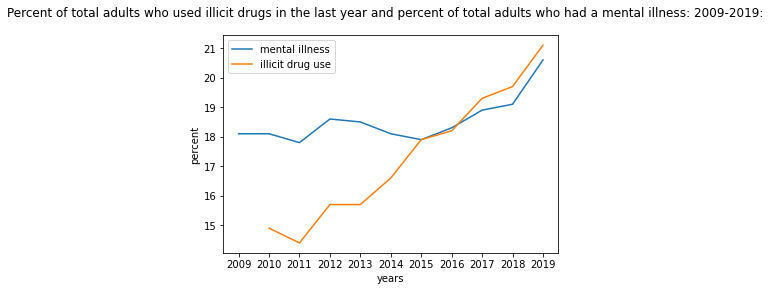

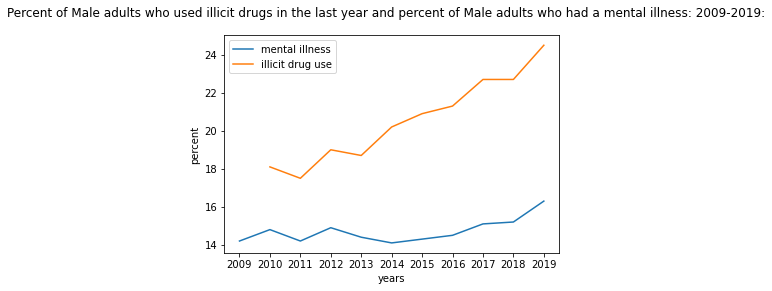

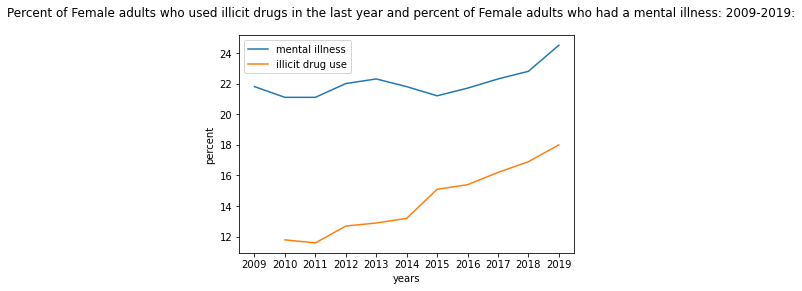

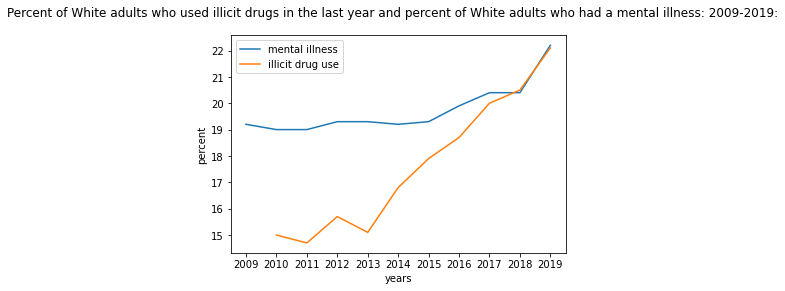

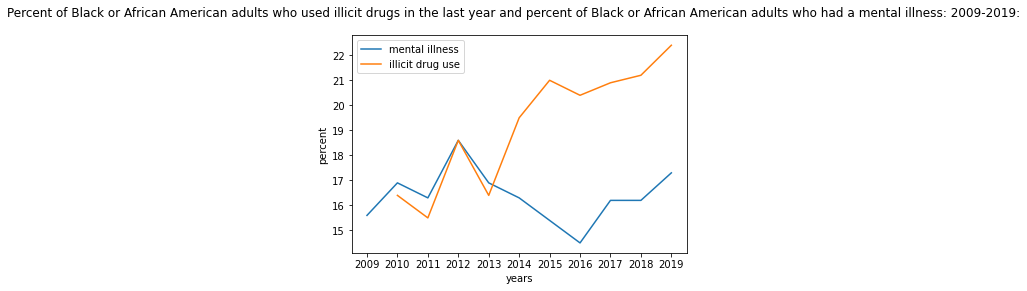

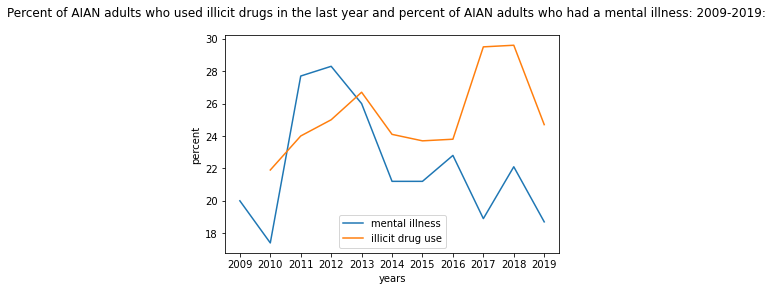

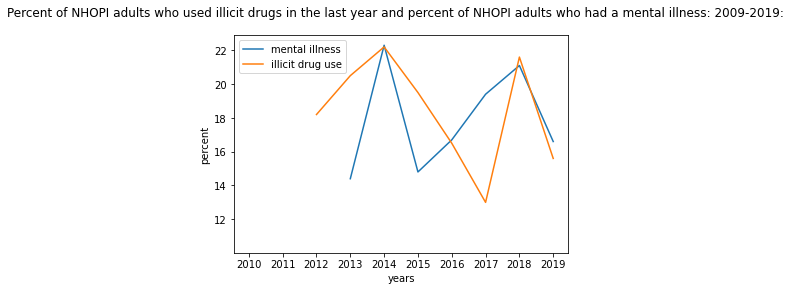

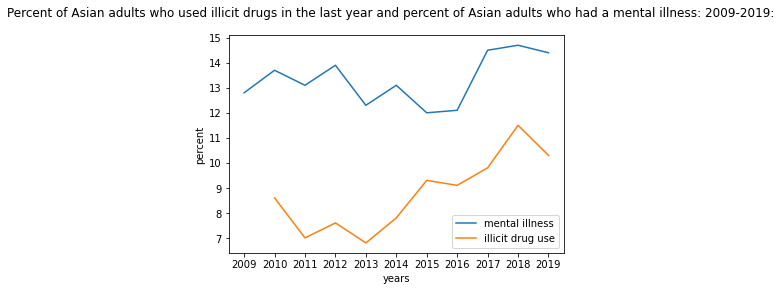

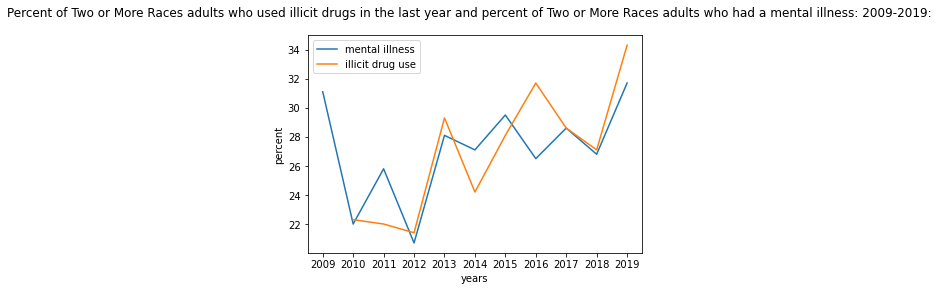

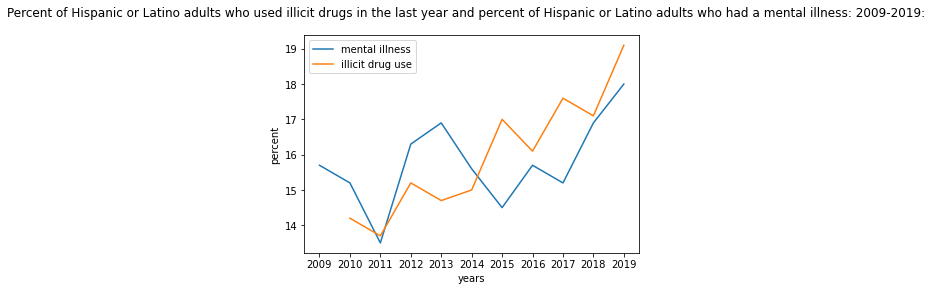

In [993]:
col_names1 = df7.columns.values.tolist()
n=0
for name in col_names1:
    fig = plt.figure(n)
    plt.plot(df2[name][1:], label = 'mental illness')
    plt.plot(df7[name][1:], label='illicit drug use')
    plt.xlabel('years')
    plt.ylabel('percent')
    fig.suptitle('Percent of '+ name + ' adults who used illicit drugs in the last year and percent of ' + name + ' adults who had a mental illness: 2009-2019:')
    plt.legend()
    plt.show()
    n+=1

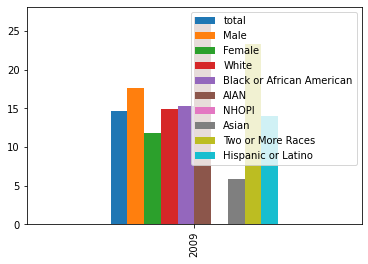

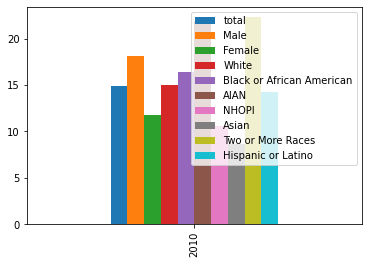

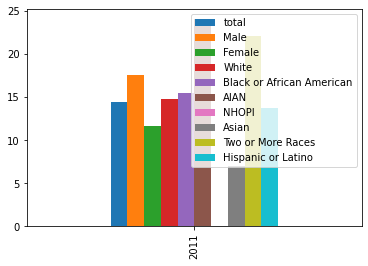

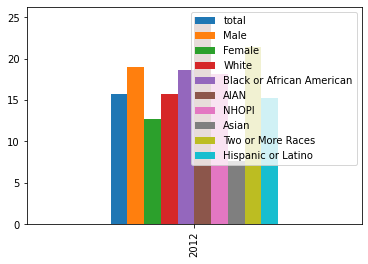

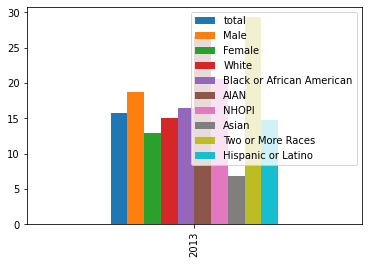

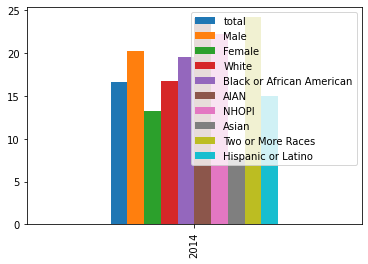

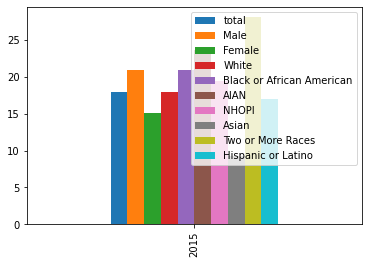

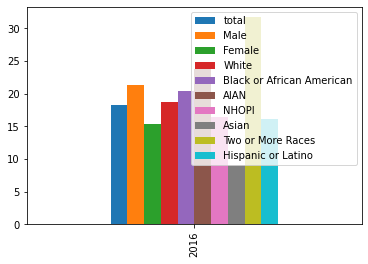

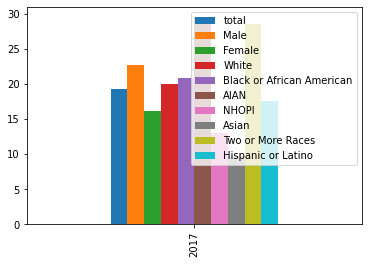

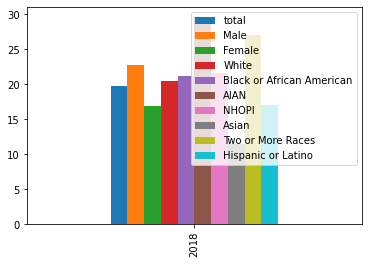

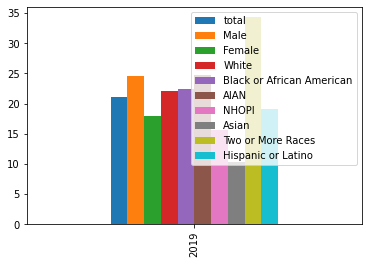

In [996]:
drug_bar = df7.groupby(by=years1[1:])
drug_bar.plot.bar()
plt.show()

## IV. Data Description

## V. Data Limitations

## VI. Questions for Reviewers